In [ ]:
!pip install brewer2mpl

In [8]:
# !pip install brewer2mpl
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
# import warnings
# warnings.filterwarnings('ignore')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.4.3
0.11.2


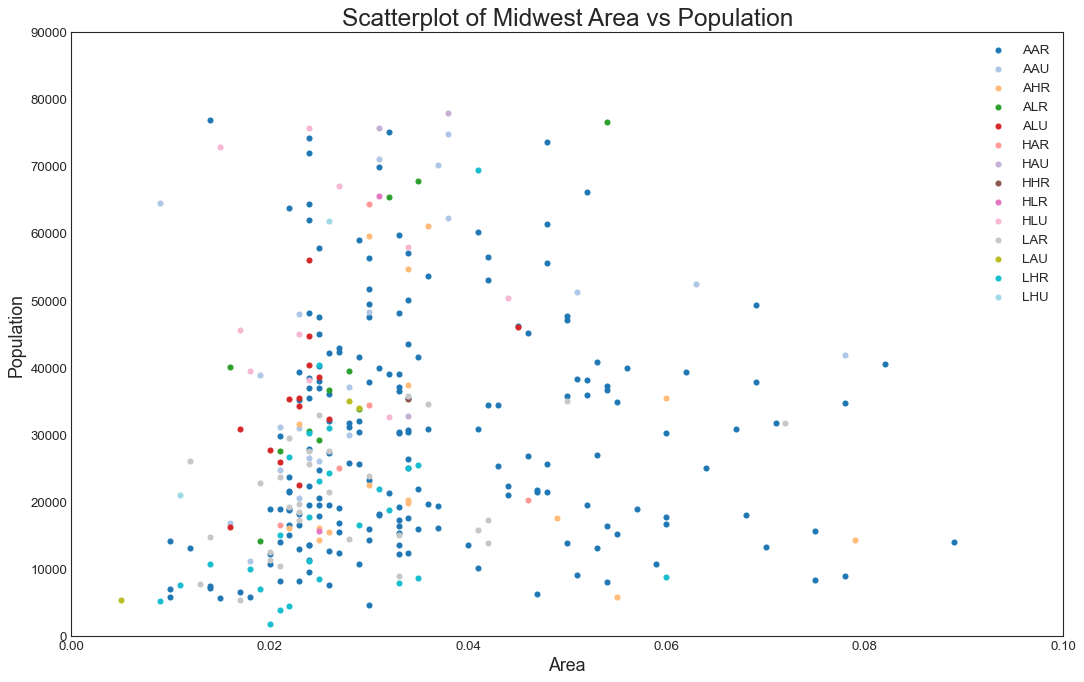

In [30]:
# Import dataset 
midwest = pd.read_csv(r"./midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
# 取出所有分类
categories = np.unique(midwest['category'])
# 针对每个分类配色
# matplotlib.cm是matplotlib库中内置的色彩映射函数。
# 使用方法：matplotlib.cm.[色彩]('[数据集]') 即对[数据集]应用[色彩]
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
# figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)
# num:图像编号或名称，数字为编号 ，字符串为名称
# figsize:指定figure的宽和高，单位为英寸；
# dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 
# facecolor:背景颜色
# edgecolor:边框颜色
# frameon:是否显示边框

plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, color=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
# plt.legend() 图例
plt.legend(fontsize=12)    
plt.show()    

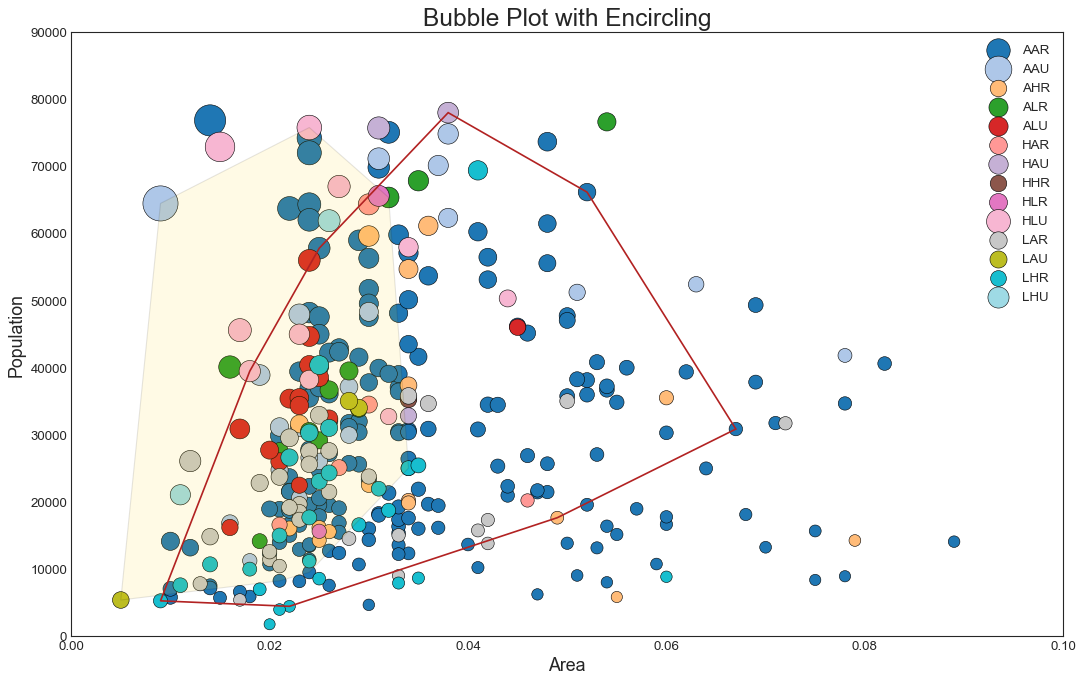

In [44]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', color=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]
midwest_encircle_data2 = midwest.loc[midwest.state=='IL', :]

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data2.area, midwest_encircle_data2.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

In [22]:
midwest

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,3045,WALWORTH,WI,0.032,75000,2343.750000,72747,454,201,494,...,6.082324,71553,95.404000,9.641804,8.699613,10.926610,6.894182,0,AAR,387.490366
328,3046,WASHBURN,WI,0.050,13772,275.440000,13585,25,122,33,...,4.022803,13532,98.257334,15.866095,21.418598,13.642483,14.329455,0,AAR,124.233095
329,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR,219.578698
330,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR,155.859825
